In [31]:
import pandas as pd
import os
import warnings
import seaborn as sns
from matplotlib import pyplot as plt

# Config
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set()

movies = pd.read_csv("Movie-Ratings.csv")
movies.columns = ["Film", "Genre", "CriticRating", "AudienceRating", "BudgetMillions", "Year"]

# Set column as a Category
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')

# Set Year as a Category...
# we don't want Python to treat this as a number when applying mean, max or min analysis
movies.Year = movies.Year.astype('category')

# List all categories within column
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

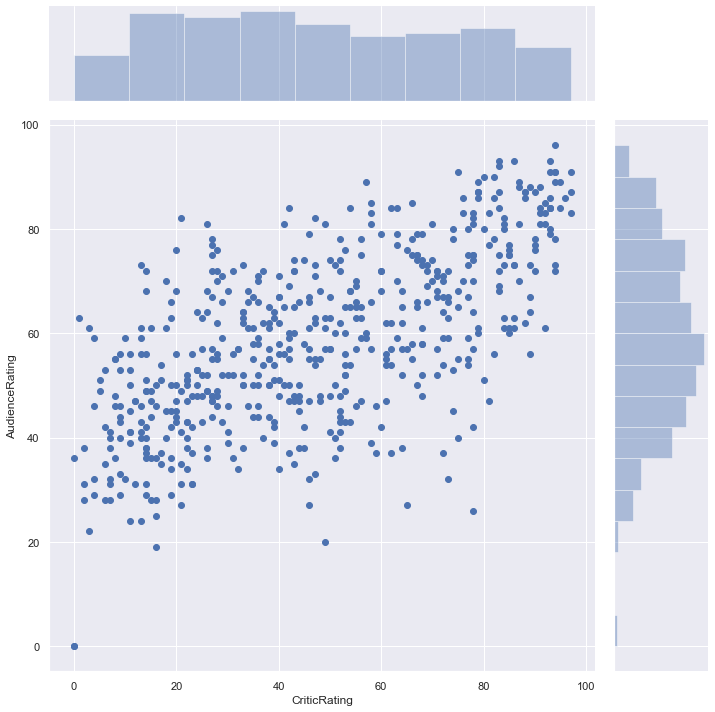

In [2]:
# Create a joint-plot
j = sns.jointplot(data=movies, x="CriticRating", y="AudienceRating", height=10)

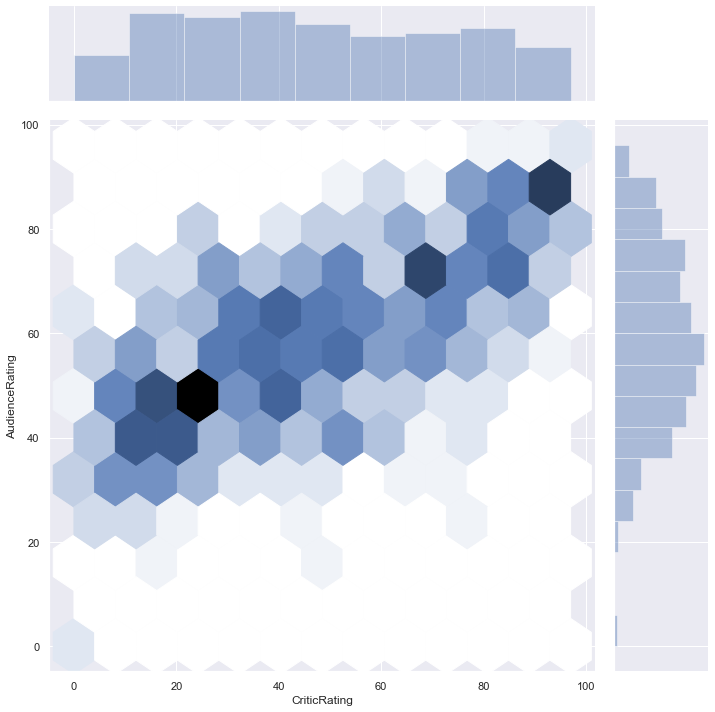

In [3]:
# Same data visualized as a hex
h = sns.jointplot(data=movies, x="CriticRating", y="AudienceRating", height=10, kind="hex")

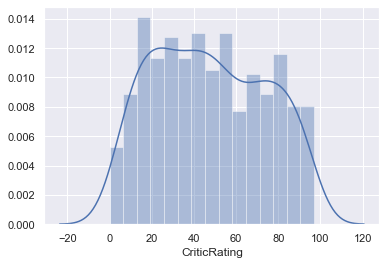

In [4]:
# Seaborn visualization of a distribution
s = sns.distplot(movies.CriticRating, bins=15)

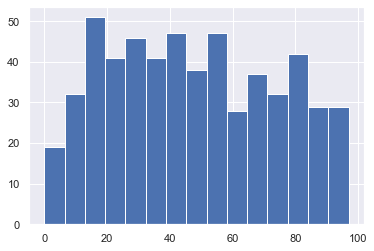

In [5]:
# Matplotlib default visualization of a distribution
hist = plt.hist(movies.CriticRating, bins=15)

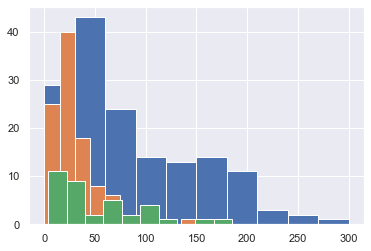

In [6]:
# Show a visualization of budget by genre
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions)
plt.show()

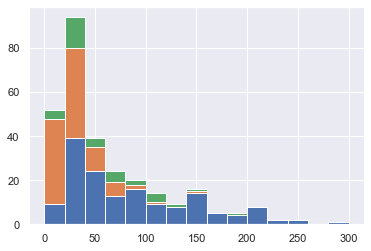

In [7]:
# Show stacked histogram
genres = [movies[movies.Genre == 'Action'].BudgetMillions,
          movies[movies.Genre == 'Drama'].BudgetMillions,
          movies[movies.Genre == 'Thriller'].BudgetMillions]
plt.hist(genres, bins=15, stacked=True)
plt.show()

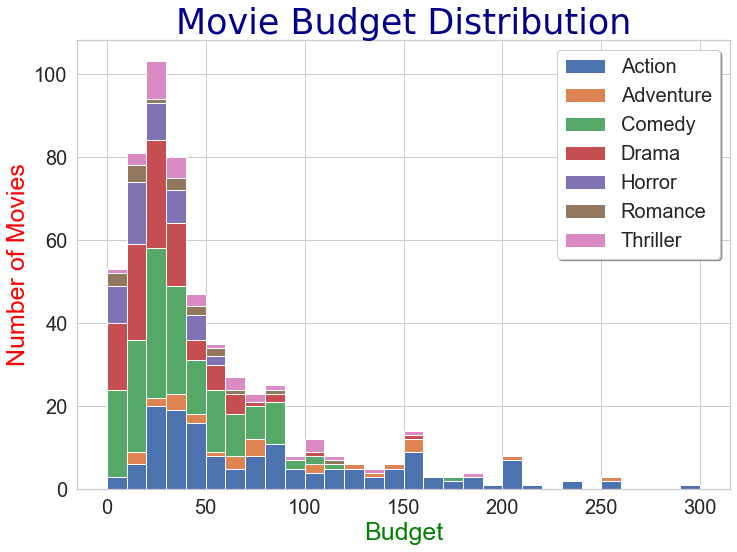

In [46]:
# Automate stacked histogram
budgets = []
labels = []
for gen in movies.Genre.cat.categories:
    budgets.append(movies[movies.Genre == gen].BudgetMillions)
    labels.append(gen)
    
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) # size of A4 paper
m = plt.hist(budgets, bins=30, stacked=True, rwidth=1, label=labels)
plt.title('Movie Budget Distribution', fontsize=35, color='darkblue', fontname='DejaVu Sans')
plt.ylabel('Number of Movies', fontsize=25, color='Red')
plt.xlabel('Budget', fontsize=25, color='Green')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(prop={'size': 20}, shadow=True)
plt.show()

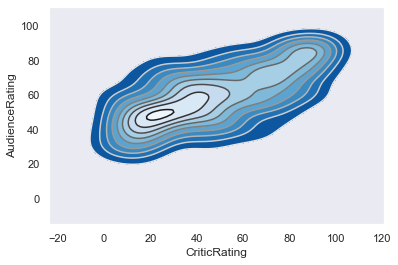

In [29]:
# KDE plot
k = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Blues_r')
kb = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='gist_gray_r')

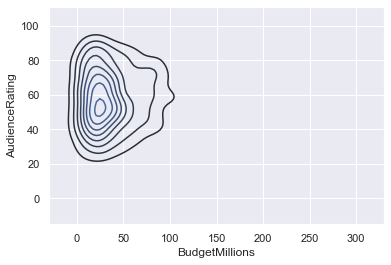

In [10]:
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

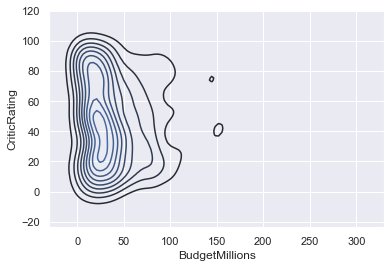

In [11]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

[(-20, 160)]

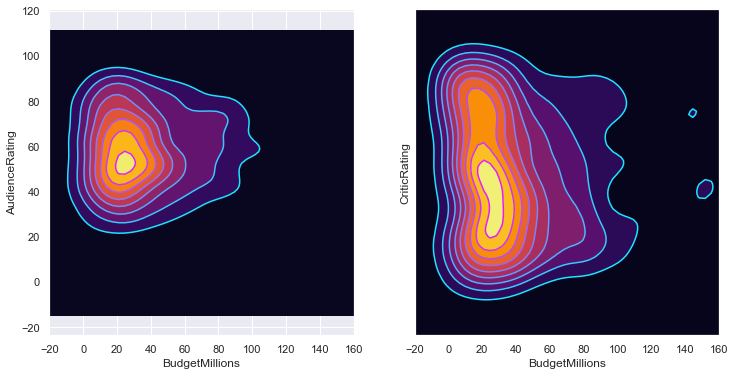

In [20]:
# Subplots config
f, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

# Individual plot config
k1 = sns.kdeplot(movies.BudgetMillions, 
                 movies.AudienceRating, 
                 ax=axes[0], 
                 shade=True, 
                 shade_lowest=True, 
                 cmap='inferno')
k1b = sns.kdeplot(movies.BudgetMillions, 
                 movies.AudienceRating, 
                 ax=axes[0], 
                 cmap='cool')

k2 = sns.kdeplot(movies.BudgetMillions,
                 movies.CriticRating,
                 ax=axes[1],
                 shade=True,
                 shade_lowest=True,
                 cmap='inferno')
k2b = sns.kdeplot(movies.BudgetMillions,
                 movies.CriticRating,
                 ax=axes[1],
                 cmap='cool')

# Cutoff white-space
k1.set(xlim=(-20, 160))
k2.set(xlim=(-20, 160))

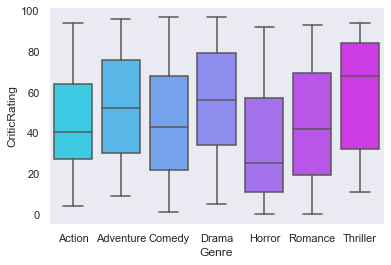

In [28]:
# Box plot
b = sns.boxplot(data=movies, x='Genre', y='CriticRating', palette='cool')

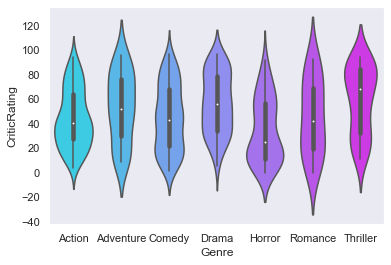

In [27]:
# Violin plot
v = sns.violinplot(data=movies, x='Genre', y='CriticRating', palette='cool')

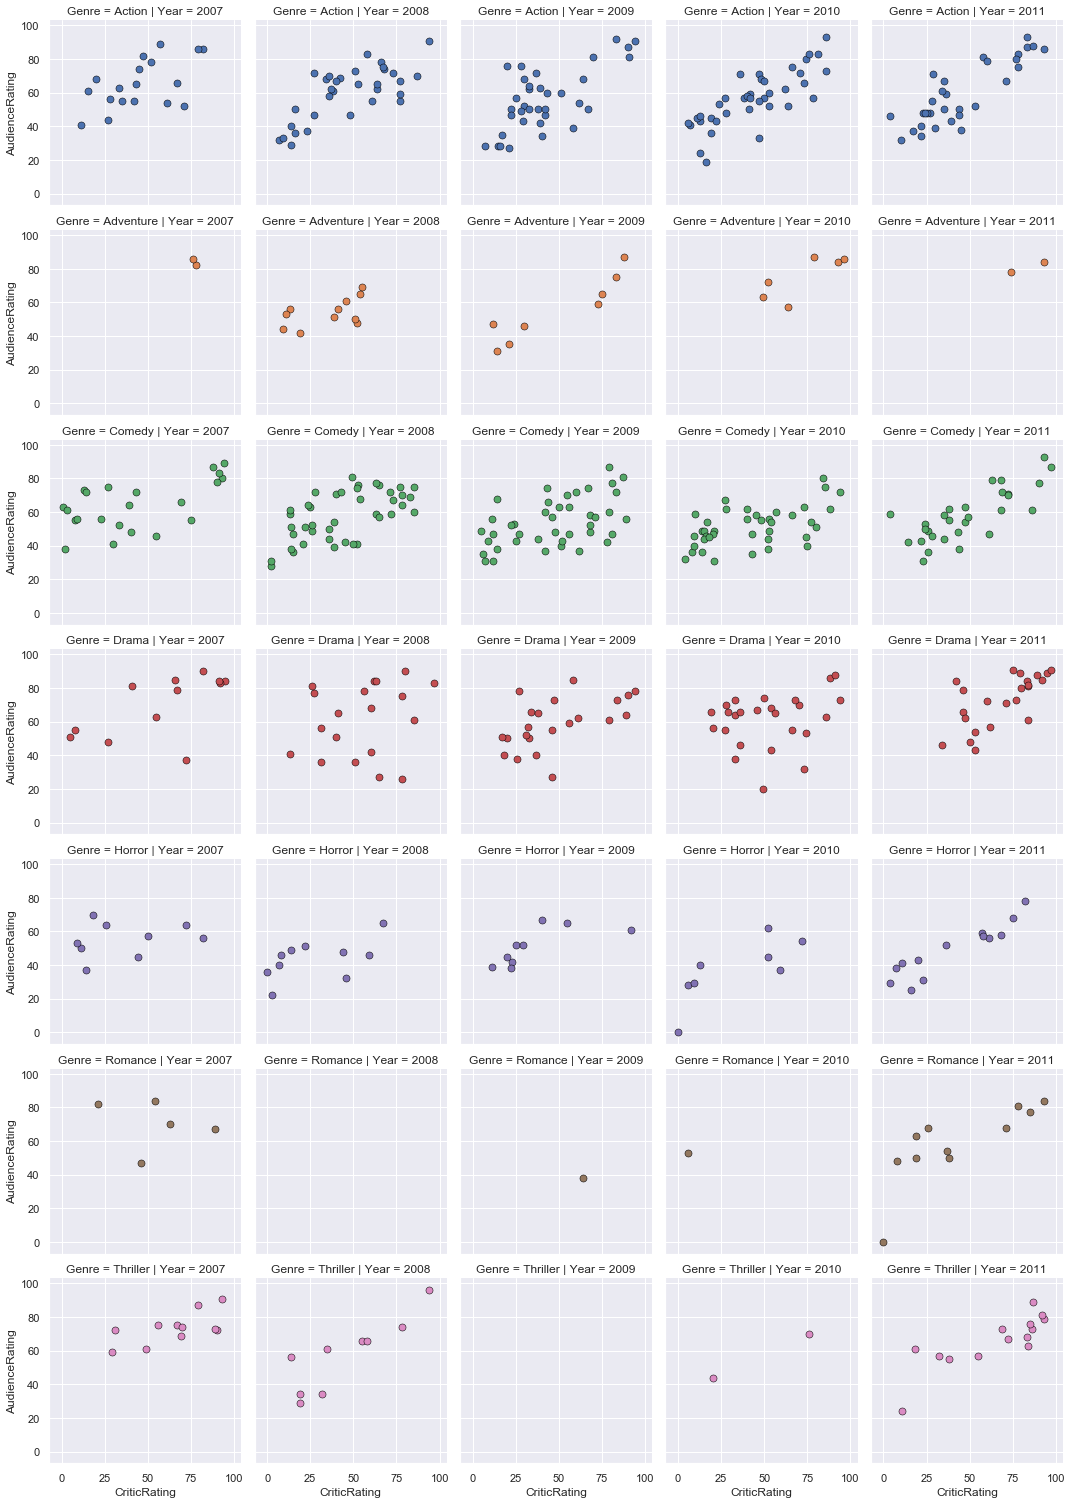

In [15]:
# Facet Grid
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

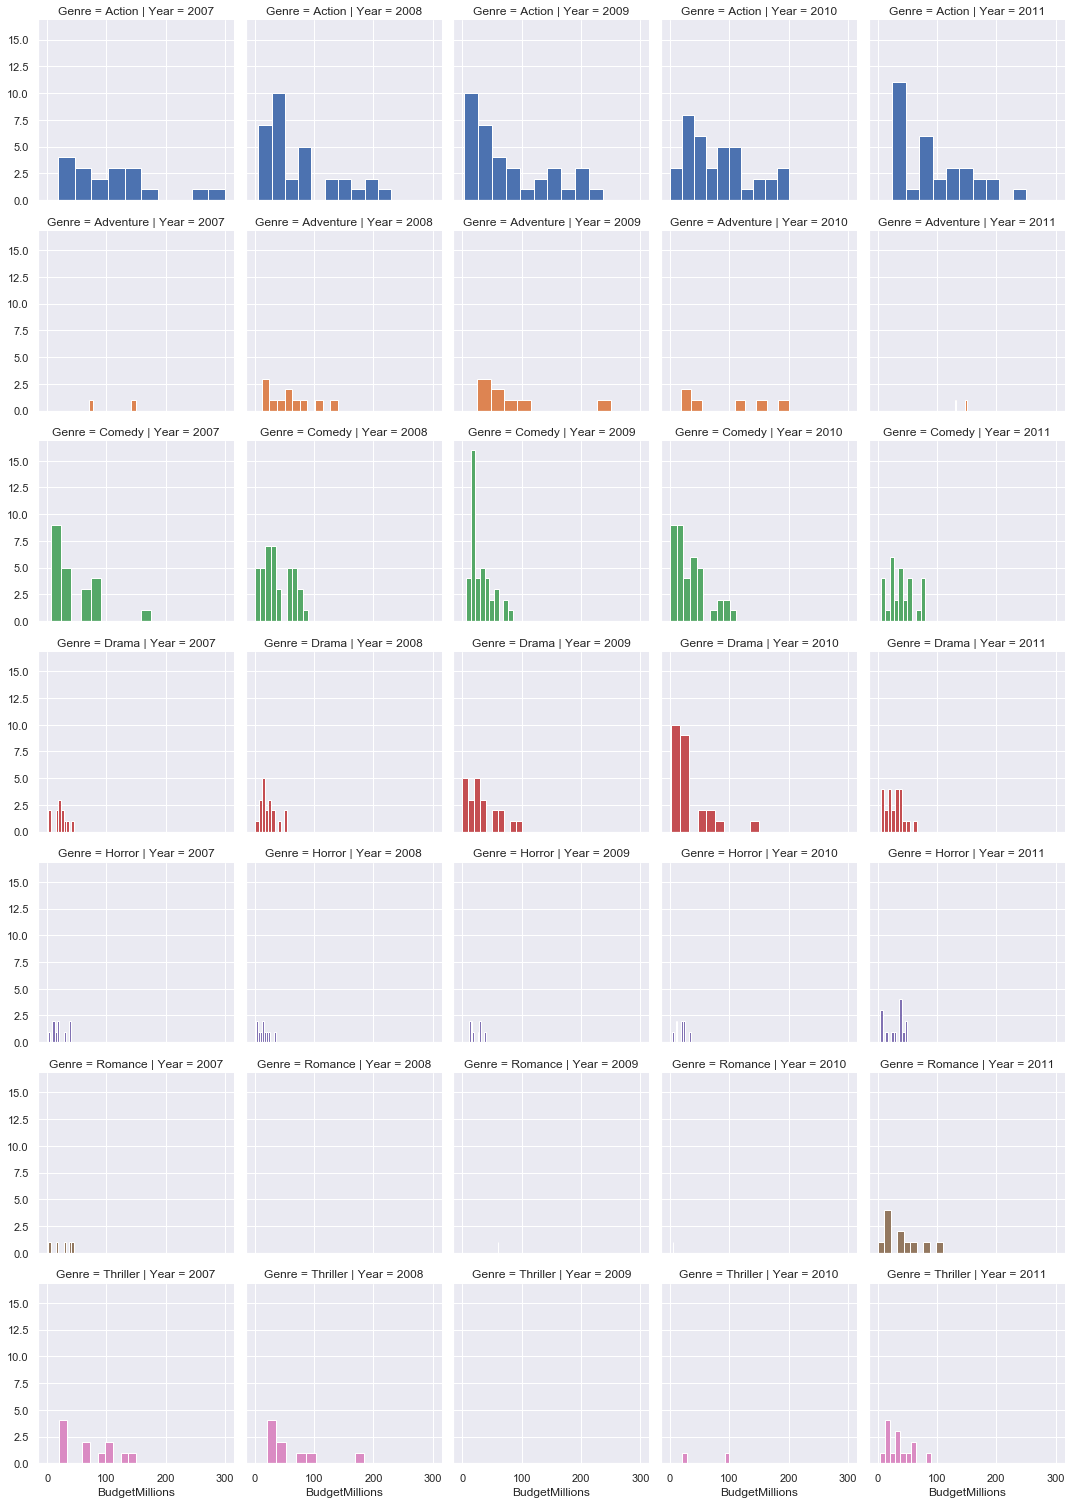

In [16]:
# Histogram example
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.hist, 'BudgetMillions')

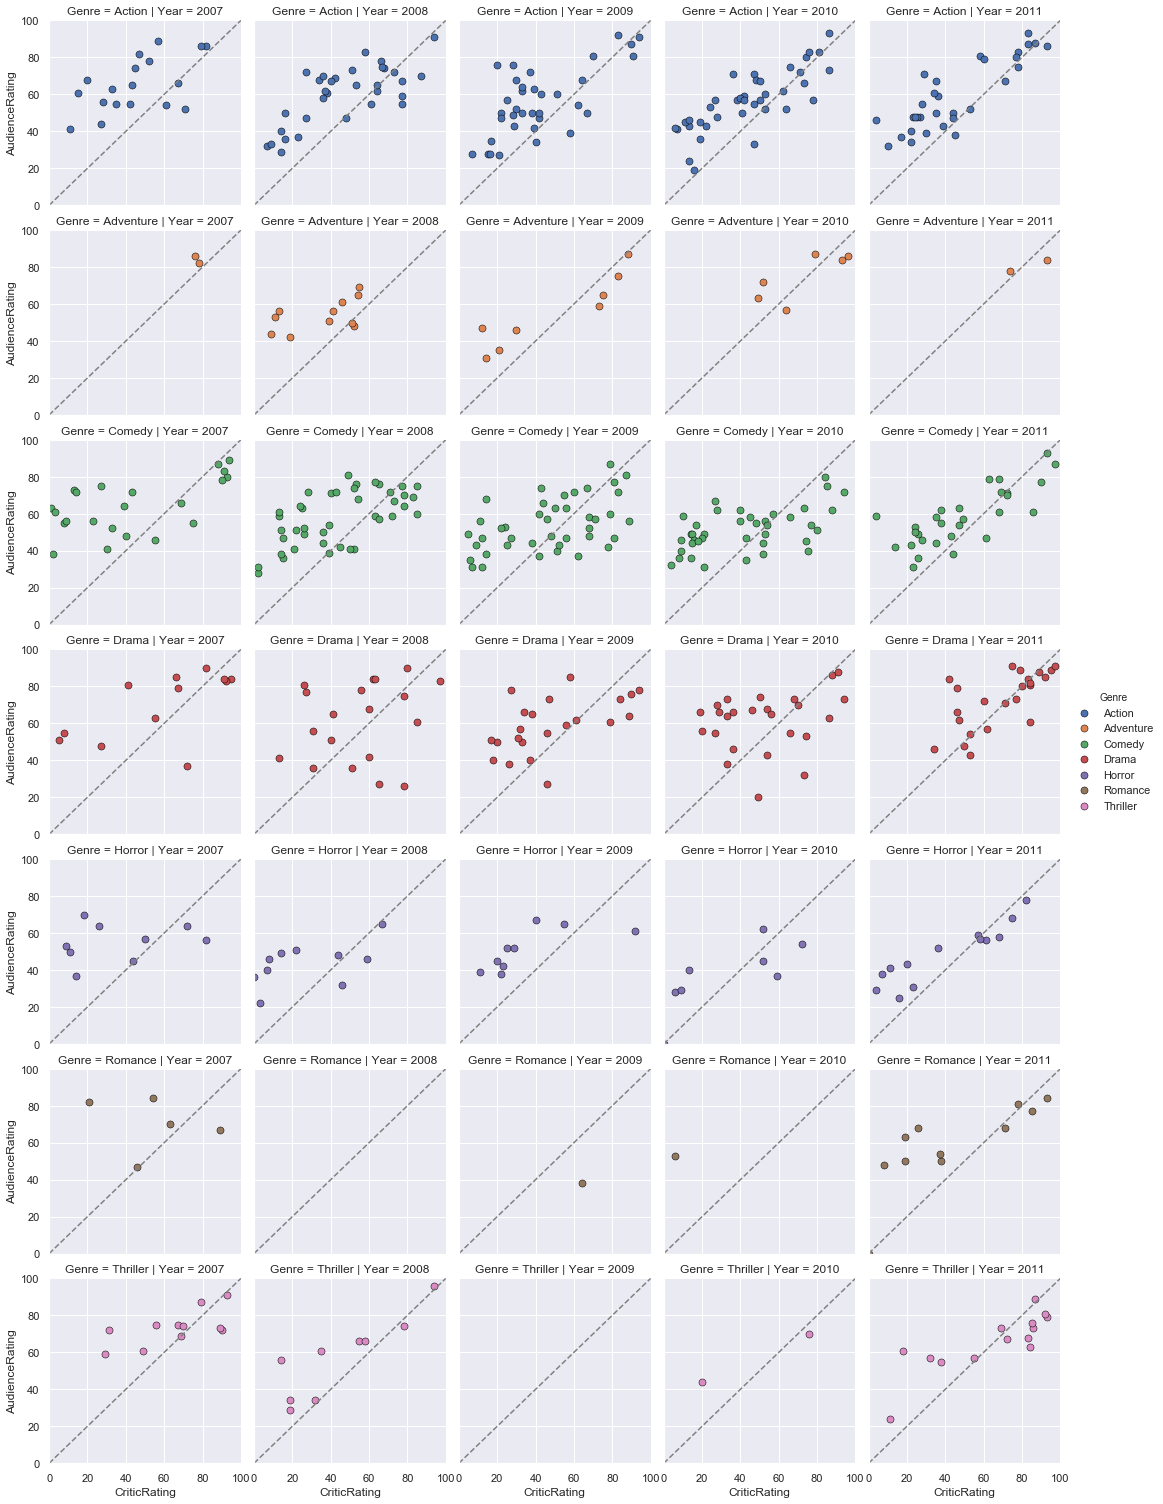

In [17]:
# Facet Grid - reset axes within bounds
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0, 100), ylim=(0, 100))

for ax in g.axes.flat:
    ax.plot((0, 100), (0, 100), c='gray', ls='--')
    
g.add_legend()